In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ads= pd.read_csv('advertising.csv')
ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
ads.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
#visualise

<AxesSubplot:xlabel='TV', ylabel='Sales'>

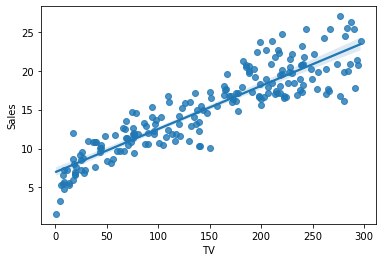

In [6]:
sns.regplot(x='TV',y='Sales', data=ads)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

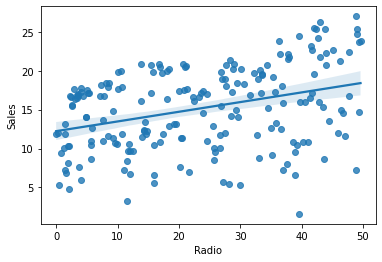

In [7]:
sns.regplot(x='Radio',y='Sales', data=ads)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

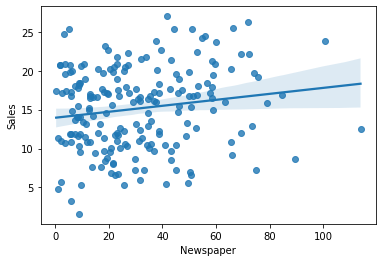

In [8]:
sns.regplot(x='Newspaper',y='Sales', data=ads)

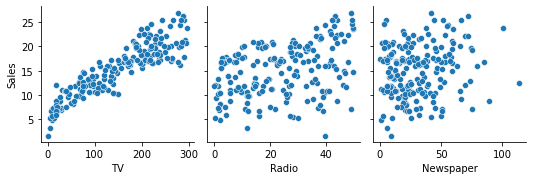

In [9]:
sns.pairplot( x_vars=['TV','Radio','Newspaper'], 
             y_vars=['Sales'],
             data=ads)


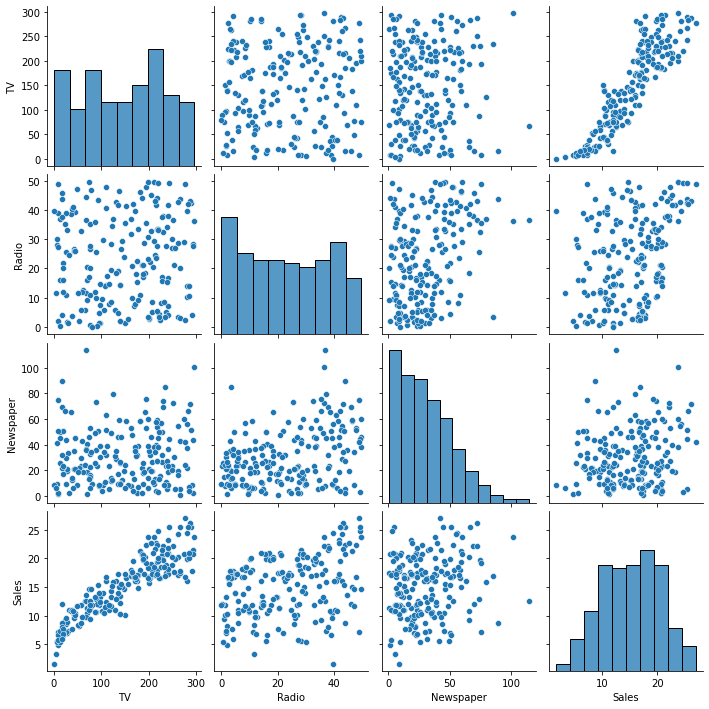

In [10]:
sns.pairplot(data=ads)

In [11]:
ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

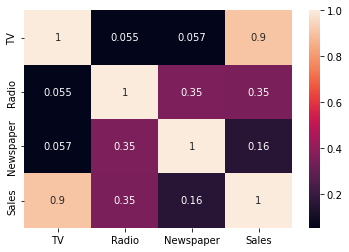

In [12]:
sns.heatmap(ads.corr(),annot=True)

$y=c+m_1x_1+m_2x_2+...+m_nx_n$  - linear regg formula
y=response
c=constant
m=coefficient

#importing stats model for training dataset like sklearn

In [13]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

**important steps in regression**
1. create x and y 
2. create train and test sets (70-30) or(80-20)
3. train model on training set (ie., learn the coefficient)
4. evaluvate the model in training set and test set

In [14]:
#create x and y 
X=ads['TV']
y=ads['Sales']

In [15]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)  #basic split
X_train.shape
#shape of the x-traain

(140,)

In [16]:
X_test.head()

126      7.8
104    238.2
99     135.2
92     217.7
111    241.7
Name: TV, dtype: float64

In [17]:
#training model

# stats model training

in statsmodel there wont be a constant value so we have to mention is ourself

In [18]:
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [19]:
#fitting the model
lr=sm.OLS(y_train, X_train_sm)       #OLS-ordinary least squares
lr_model=lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

const  -  6.948683
TV     - 0.054546   
here the co-eff of constant is 6.9 and co-eff of TV is 0.05 
which means
the sales of tv is 6.9 + 0.05 *TV

In [20]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 16 May 2023   Prob (F-statistic):           1.52e-52
Time:                        20:00:58   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
X1=ads['Radio']
y1=ads['Sales']

In [22]:
X1_train, X1_test, y1_train,y1_test = train_test_split(X1, y1, train_size=0.70, test_size= 0.30, random_state= 100)

In [23]:
X1_train_sm = sm.add_constant(X1_train)
X1_train_sm.head()

,const,Radio
74,1.0,24.6
3,1.0,41.3
185,1.0,45.1
26,1.0,29.3
90,1.0,4.9


In [24]:
lr1=sm.OLS(y1_train, X1_train_sm)
lr1_model=lr1.fit()
lr1_model.params

const    12.164674
Radio     0.123920
dtype: float64

In [25]:
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     17.38
Date:                Tue, 16 May 2023   Prob (F-statistic):           5.36e-05
Time:                        20:00:58   Log-Likelihood:                -431.24
No. Observations:                 140   AIC:                             866.5
Df Residuals:                     138   BIC:                             872.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1647      0.816     14.914      0.000      10.552      13.777
Radio          0.1239      0.030      4.169      0.000       0.065       0.183
==============================================================================
Omnibus:                        9.946   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                6.526
Skew:                          -0.384   Prob(JB):                       0.0383
Kurtosis:                       2.273   Cond. No.                         50.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
y_train_pred = lr_model.predict(X_train_sm)

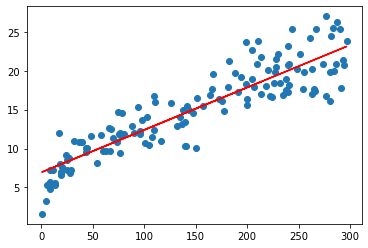

In [27]:
plt.scatter(X_train, y_train)
#plt.plot(X_train,6.9487+0.0545*X_train, 'r')          # 6.9487+0.0545*X_train called as y_train _predict
plt.plot(X_train,y_train_pred, 'r')
plt.show()

In [28]:
y1_train_pred = lr_model.predict(X1_train_sm)

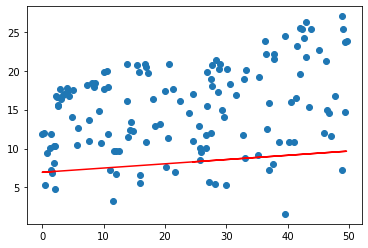

In [29]:
plt.scatter(X1_train, y1_train)
plt.plot(X1_train,y1_train_pred, 'r')
plt.show()

# residual analysis  i.e error analysis

In [30]:
res =y_train -y_train_pred

Text(0.5, 1.0, 'Residual plot')

<Figure size 432x288 with 0 Axes>

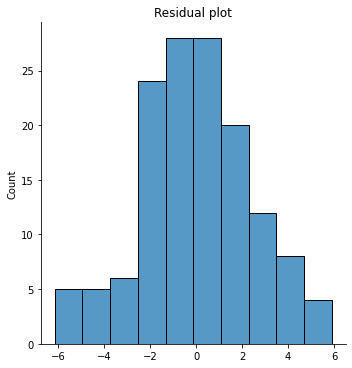

In [31]:
plt.figure()
sns.displot(res)
plt.title('Residual plot')

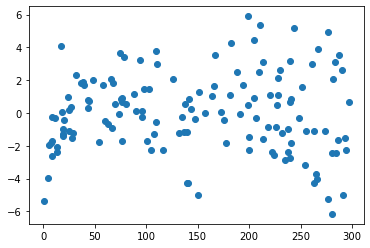

In [32]:
#look for patterns in residual (should not be able to identifiy)
plt.scatter(X_train, res)
plt.show()

In [33]:
res1=y1_train -y1_train_pred

Text(0.5, 1.0, 'resplot')

<Figure size 432x288 with 0 Axes>

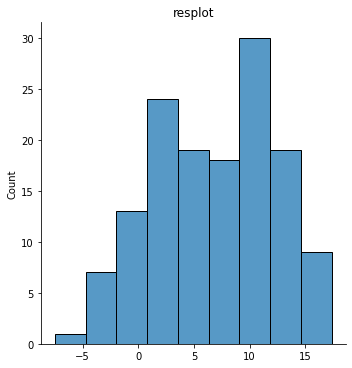

In [34]:
plt.figure()
sns.displot(res1)
plt.title('resplot')

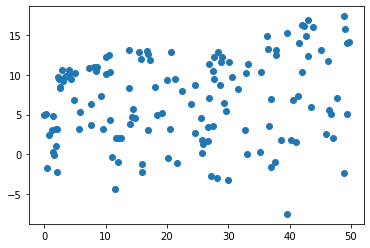

In [35]:
plt.scatter(X1_train,res1)
plt.show()

# evaluation on test set

In [36]:
#make prediction on the test model (y_test_pred)
# evsluste the model by using r-squared on the test

In [37]:
#add constant
X_test_sm = sm.add_constant(X_test)

#pred on test set; 
y_test_pred = lr_model.predict(X_test_sm)


In [38]:
# evsluste the model by using r-squared on the test  
# need to download new metrics from sklearn for value evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [39]:
#r2 on test
r2 = r2_score(y_true= y_test,y_pred=y_test_pred)
r2

0.7921031601245658

In [40]:
#mean sq error
mean_squared_error(y_true= y_test,y_pred=y_test_pred)

4.077556371826956

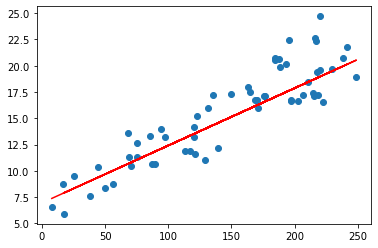

In [41]:
plt.scatter(X_test, y_test)
plt.plot(X_test,y_test_pred, 'r')
plt.show()

# Linear regression using sklearn

In [42]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

# steps in sklearn for model building
#1. create a object of linear regresion
#2. fit the model
#3. see params, make prediction
#4. evaluate (r2, etc)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lm=LinearRegression()

In [66]:
lm.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[213.4 151.5 205.  142.9 134.3  80.2 239.8  88.3  19.4 225.8 136.2  25.1
  38.  172.5 109.8 240.1 232.1  66.1 218.4 234.5  23.8  67.8 296.4 141.3
 175.1 220.5  76.4 253.8 191.1 287.6 100.4 228.  125.7  74.7  57.5 262.7
 262.9 237.4 227.2 199.8 228.3 290.7 276.9 199.8 239.3  73.4 284.3 147.3
 224.  198.9 276.7  13.2  11.7 280.2  39.5 265.6  27.5 280.7  78.2 163.3
 213.5 293.6  18.7  75.5 166.8  44.7 109.8   8.7 266.9 206.9 149.8  19.6
  36.9 199.1 265.2 165.6 140.3 230.1   5.4  17.9 237.4 286.   93.9 292.9
  25.   97.5  26.8 281.4  69.2  43.1 255.4 239.9 209.6   7.3 240.1 102.7
 243.2 137.9  18.8  17.2  76.4 139.5 261.3  66.9  48.3 177.   28.6 180.8
 222.4 193.7  59.6 131.7   8.4  13.1   4.1   0.7  76.3 250.9 273.7  96.2
 210.8  53.5  90.4 104.6 283.6  95.7 204.1  31.5 182.6 289.7 156.6 107.4
  43.  248.4 116.  110.7 187.9 139.3  62.3   8.6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [60]:
# have to create 2d array( 140,1 ) instead of 1d array (140, )
#create new variable and reshape the value of train
X_train_lr = X_train.values.reshape(-1, 1)
X_test_lr = X_test.values.reshape(-1, 1)
X_train_lr.shape

(140, 1)

In [61]:
lm.fit(X_train_lr, y_train)

LinearRegression()

In [65]:
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [68]:
#make predictions
y_train_pred= lm.predict(X_train_lr)
y_test_pred=lm.predict(X_test_lr)

In [69]:
#evaluate
print(r2_score(y_true= y_train,y_pred=y_train_pred))
print(r2_score(y_true= y_test,y_pred=y_test_pred))

0.8157933136480389
0.7921031601245662
